In [239]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
#load csv
df = pd.read_csv('thai_road_accident_2019_2022.csv')

In [240]:
#preview dataset
df.head()

,acc_code,incident_datetime,report_datetime,province_th,province_en,agency,route,vehicle_type,presumed_cause,accident_type,number_of_vehicles_involved,number_of_fatalities,number_of_injuries,weather_condition,latitude,longitude,road_description,slope_description
0,571905,2019-01-01 00:00:00,2019-01-02 06:11:00,ลพบุรี,Loburi,department of rural roads,แยกทางหลวงหมายเลข 21 (กม.ที่ 31+000) - บ้านวัง...,motorcycle,driving under the influence of alcohol,other,1,0,2,clear,14.959105,100.873463,straight road,no slope
1,3790870,2019-01-01 00:03:00,2020-02-20 13:48:00,อุบลราชธานี,Ubon Ratchathani,department of highways,เดชอุดม - อุบลราชธานี,private/passenger car,speeding,rollover/fallen on straight road,1,0,2,clear,15.210738,104.862689,straight road,no slope
2,599075,2019-01-01 00:05:00,2019-01-01 10:35:00,ประจวบคีรีขันธ์,Prachuap Khiri Khan,department of highways,ปราณบุรี - ปากน้ำปราณ,motorcycle,speeding,head-on collision (not overtaking),2,1,0,clear,12.374259,99.907949,wide curve,slope area
3,571924,2019-01-01 00:20:00,2019-01-02 05:12:00,เชียงใหม่,Chiang Mai,department of rural roads,เชื่อมทางหลวงหมายเลข 1013 (กม.ที่ 8+200) - บ้า...,motorcycle,driving under the influence of alcohol,other,1,0,1,clear,18.601721,98.804204,straight road,no slope
4,599523,2019-01-01 00:25:00,2019-01-04 09:42:00,นครสวรรค์,Nakhon Sawan,department of highways,เกยไชย - ศรีมงคล,private/passenger car,cutting in closely by people/vehicles/animals,rollover/fallen on straight road,1,0,0,clear,15.866389,100.590010,straight road,no slope


Let's get to know our dataset better.

We will run a few lines of codes to query some information about our dataset

- How many samples and columns does our data set have?
- Are the datatypes correct?
- Are there any missing values?
- How many unique values are there?
- Are there any duplicated rows we need to filter out?



## How many samples and columns does our data set have?

In [241]:
#number of samples and columns in each data set
df.shape

(81735, 18)

## Are the datatypes correct?

In [242]:
#datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81735 entries, 0 to 81734
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   acc_code                     81735 non-null  int64  
 1   incident_datetime            81735 non-null  object 
 2   report_datetime              81735 non-null  object 
 3   province_th                  81735 non-null  object 
 4   province_en                  81735 non-null  object 
 5   agency                       81735 non-null  object 
 6   route                        81735 non-null  object 
 7   vehicle_type                 81735 non-null  object 
 8   presumed_cause               81735 non-null  object 
 9   accident_type                81735 non-null  object 
 10  number_of_vehicles_involved  81735 non-null  int64  
 11  number_of_fatalities         81735 non-null  int64  
 12  number_of_injuries           81735 non-null  int64  
 13  weather_conditio

## Are there any missing values?

In [243]:
#Columns with missing value
df.isnull().sum()

acc_code                         0
incident_datetime                0
report_datetime                  0
province_th                      0
province_en                      0
agency                           0
route                            0
vehicle_type                     0
presumed_cause                   0
accident_type                    0
number_of_vehicles_involved      0
number_of_fatalities             0
number_of_injuries               0
weather_condition                0
latitude                       359
longitude                      359
road_description                 0
slope_description                0
dtype: int64

## How many unique values are there?

In [244]:
#number of non-null unique values for each column
df.nunique()

acc_code                       81735
incident_datetime              67917
report_datetime                66234
province_th                       78
province_en                       78
agency                             3
route                           3882
vehicle_type                      15
presumed_cause                    54
accident_type                     11
number_of_vehicles_involved       18
number_of_fatalities              13
number_of_injuries                41
weather_condition                  7
latitude                       74807
longitude                      74322
road_description                  19
slope_description                  3
dtype: int64

The results from running df.nunique() provided us with a more indepth information of our dataset. We've discovered that there are 11 accident types, and we'll use the .unique() function to display what those 11 types are.


In [245]:
for i, accident_type in enumerate(df['accident_type'].unique(), start=1):
    print(f"{i}. {accident_type}")

1. other
2. rollover/fallen on straight road
3. head-on collision (not overtaking)
4. collision at intersection corner
5. collision with obstruction (on road surface)
6. rear-end collision
7. pedestrian collision
8. rollover/fallen on curved road
9. collision during overtaking
10. turning/retreating collision
11. side collision


# Changing data types, finding duplicates, and dropping nulls
1. Changing datatype:
    As we can see from df.info datetime column types are object. Let's fix that so we can utilize this column to further       our analysis
2. Finding and removing duplicates (if any):
    We will be using df.duplicated().sum() to remove any duplicated rows
3. Drop Nulls
    From df.isnull.sum() we've uncovered that there are 359 rows without latitude and longitude. 

## Changing data types

In [246]:
#Changing datetime columns to datetime datatypes
df['incident_datetime'] = pd.to_datetime(df['incident_datetime'])
df['report_datetime'] = pd.to_datetime(df['report_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81735 entries, 0 to 81734
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   acc_code                     81735 non-null  int64         
 1   incident_datetime            81735 non-null  datetime64[ns]
 2   report_datetime              81735 non-null  datetime64[ns]
 3   province_th                  81735 non-null  object        
 4   province_en                  81735 non-null  object        
 5   agency                       81735 non-null  object        
 6   route                        81735 non-null  object        
 7   vehicle_type                 81735 non-null  object        
 8   presumed_cause               81735 non-null  object        
 9   accident_type                81735 non-null  object        
 10  number_of_vehicles_involved  81735 non-null  int64         
 11  number_of_fatalities         81735 non-nu

## Finding duplicates

In [247]:
#Finding duplicates
df.duplicated().sum()

0

There are no duplicated rows in this dataset

## Dropping nulls

In [248]:
#Columns with missing value
df.isnull().sum()

acc_code                         0
incident_datetime                0
report_datetime                  0
province_th                      0
province_en                      0
agency                           0
route                            0
vehicle_type                     0
presumed_cause                   0
accident_type                    0
number_of_vehicles_involved      0
number_of_fatalities             0
number_of_injuries               0
weather_condition                0
latitude                       359
longitude                      359
road_description                 0
slope_description                0
dtype: int64

We've detected 359 missing values from longitude and latitude. We will then run df.dropna() and inplace=True as parameter to  apply changes to the current dataframe

In [249]:
df.dropna(inplace=True)

In [250]:
#rechecking if dropna has been applied
df.isnull().sum().any()

False

## Seperate Datetime Values

In [251]:
# Extract year, month, day, and time into separate columns
df['incident_year'] = df['incident_datetime'].dt.year
df['incident_month'] = df['incident_datetime'].dt.month
df['incident_day'] = df['incident_datetime'].dt.day
df['incident_time'] = df['incident_datetime'].dt.time

df['report_year'] = df['report_datetime'].dt.year
df['report_month'] = df['report_datetime'].dt.month
df['report_day'] = df['report_datetime'].dt.day
df['report_time'] = df['report_datetime'].dt.time

In [252]:
df = df[['acc_code', 'incident_datetime', 'incident_year', 'incident_month', 'incident_day', 'incident_time', 'report_datetime', 'report_year', 'report_month', 'report_day', 'report_time', 'province_th', 'province_en', 'agency', 'route', 'vehicle_type', 'presumed_cause', 'accident_type', 'number_of_vehicles_involved', 'number_of_fatalities', 'number_of_injuries', 'weather_condition', 'latitude', 'longitude', 'road_description', 'slope_description']]
df.head()


,acc_code,incident_datetime,incident_year,incident_month,incident_day,incident_time,report_datetime,report_year,report_month,report_day,...,presumed_cause,accident_type,number_of_vehicles_involved,number_of_fatalities,number_of_injuries,weather_condition,latitude,longitude,road_description,slope_description
0,571905,2019-01-01 00:00:00,2019,1,1,00:00:00,2019-01-02 06:11:00,2019,1,2,...,driving under the influence of alcohol,other,1,0,2,clear,14.959105,100.873463,straight road,no slope
1,3790870,2019-01-01 00:03:00,2019,1,1,00:03:00,2020-02-20 13:48:00,2020,2,20,...,speeding,rollover/fallen on straight road,1,0,2,clear,15.210738,104.862689,straight road,no slope
2,599075,2019-01-01 00:05:00,2019,1,1,00:05:00,2019-01-01 10:35:00,2019,1,1,...,speeding,head-on collision (not overtaking),2,1,0,clear,12.374259,99.907949,wide curve,slope area
3,571924,2019-01-01 00:20:00,2019,1,1,00:20:00,2019-01-02 05:12:00,2019,1,2,...,driving under the influence of alcohol,other,1,0,1,clear,18.601721,98.804204,straight road,no slope
4,599523,2019-01-01 00:25:00,2019,1,1,00:25:00,2019-01-04 09:42:00,2019,1,4,...,cutting in closely by people/vehicles/animals,rollover/fallen on straight road,1,0,0,clear,15.866389,100.590010,straight road,no slope


# Exploring with data

In [253]:
df.describe()

,acc_code,incident_year,incident_month,incident_day,report_year,report_month,report_day,number_of_vehicles_involved,number_of_fatalities,number_of_injuries,latitude,longitude
count,8.137600e+04,81376.000000,81376.000000,81376.000000,81376.000000,81376.000000,81376.000000,81376.000000,81376.000000,81376.000000,81376.000000,81376.000000
mean,4.228913e+06,2020.525868,6.468762,15.724870,2020.787124,5.854490,16.211438,1.534826,0.146136,0.813864,14.377542,100.808802
std,2.128999e+06,1.110495,3.631612,9.044151,1.151265,3.732134,9.192524,0.807075,0.434604,1.464071,3.065689,1.484859
min,5.718340e+05,2019.000000,1.000000,1.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.001108,18.017161
25%,3.789326e+06,2020.000000,3.000000,8.000000,2020.000000,3.000000,8.000000,1.000000,0.000000,0.000000,13.510107,99.885506
50%,3.823434e+06,2021.000000,6.000000,15.000000,2021.000000,5.000000,16.000000,1.000000,0.000000,0.000000,14.468878,100.555529
75%,5.830777e+06,2022.000000,10.000000,24.000000,2022.000000,9.000000,24.000000,2.000000,0.000000,1.000000,16.567408,101.292237
max,7.571316e+06,2022.000000,12.000000,31.000000,2023.000000,12.000000,31.000000,27.000000,13.000000,51.000000,41.549515,105.517239


### Pattern of accidents by month

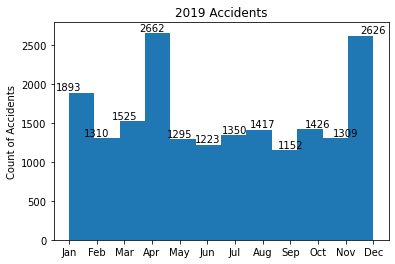

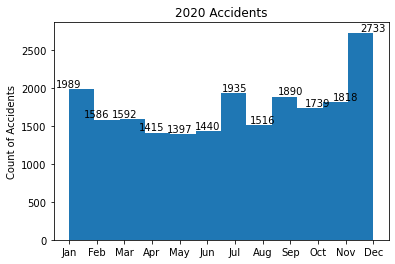

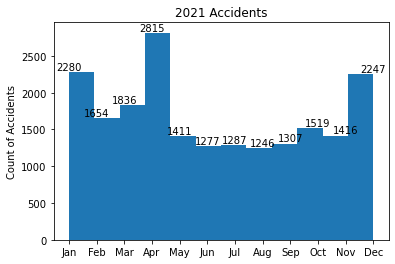

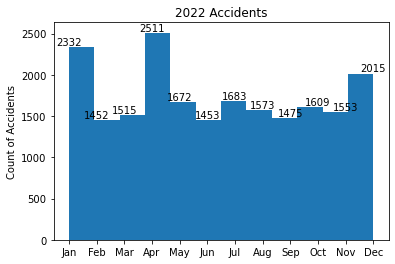

In [254]:
#plotting bar chart for count of accidents 
for i in range(2019, 2023):
    data = df[df["incident_year"] == i]['incident_month']
    plt.hist(data, bins=12)
    
    plt.title(str(i) + " Accidents")
    plt.ylabel("Count of Accidents")
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Add values on top of the bars
    for month, count in zip(range(1, 13), data.value_counts().sort_index()):
        plt.text(month, count, str(count), ha='center', va='bottom')
    
    plt.show()

Accidents Generally corresponds to long holidays in thailand especially during Songkran and New Years

### Top 10 Provinces with the most accidents

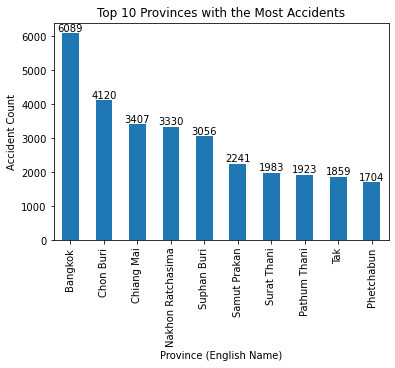

In [255]:
# Extract the top 10 provinces with the highest number of accidents and create a bar plot
top_10_provinces = df['province_en'].value_counts().head(10)
top_10_provinces.plot(kind='bar')

# Add text labels on top of each bar indicating the exact count of accidents
for i, count in enumerate(top_10_provinces):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Province (English Name)')
plt.ylabel('Accident Count')
plt.title('Top 10 Provinces with the Most Accidents')
plt.show()

The most accidents happen in Bangkok, which has the highest amount of population per province. Let's normalize population to figure out which province yields the most fatility when population is considered

### Fatality per 100k by province

In [260]:
#get population data from another CSV file
dfp = pd.read_csv('TH Population.csv')
dfp['Population'] = dfp['Population'].str.replace(',', '').astype('int64')
dfp = dfp.drop(columns=['Name', 'Status']).reset_index(drop=True)

#left joining road accident data with province population data 
#so all rows from road accident data are retained, and matching rows from population data are added
df2 = pd.merge(df, dfp, left_on='province_th', right_on='Native', how='left')

#calculating death per 100k of population
df2['fatality_rate'] = (df2['number_of_fatalities'] / df2['Population']) * 100000

#groups the DataFrame by province, sums the fatality rates for each province
fatality_rate_by_province = df2.groupby('province_en')['fatality_rate'].sum()
fatality_rate_by_province = fatality_rate_by_province.reset_index()
fatality_rate_by_province = fatality_rate_by_province.sort_values(by=['fatality_rate'],ascending=False)
fatality_rate_by_province

,province_en,fatality_rate
7,Chanthaburi,58.245489
48,Prachuap Khiri Khan,55.194805
23,Mukdahan,52.893045
64,Suphan Buri,52.728955
5,Chai Nat,50.316456
...,...,...
46,Phuket,6.849315
25,Nakhon Pathom,6.615412
74,Yala,6.208426
2,Bangkok,1.381122


When population is put into consideration, Chantaburi is the most dangerous place to drive at, having 58.25 fatalities per 100k individuals, while Bangkok is now the lowest having 1.38 fatalities per 100k individuals. 

###  Average deaths  per accident type

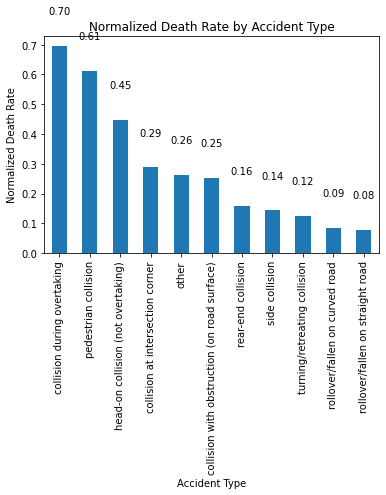

In [257]:
# Extract relevant columns from the original DataFrame
df_fatality = df[['accident_type', 'number_of_fatalities']].copy()

# Group by accident type, summing up total fatalities and counting the number of accidents for each type
fatality_per_accident = df_fatality.groupby('accident_type').agg({
    'number_of_fatalities': 'sum',
    'accident_type': 'count'
})

# Rename columns for clarity
fatality_per_accident.columns = ['Total Deaths', 'Accident Count']

# Calculate normalized death rate (deaths per accident) and keep only the relevant column
fatality_per_accident['Normalized Death'] = (fatality_per_accident['Total Deaths'] / fatality_per_accident['Accident Count'])
fatality_per_accident = fatality_per_accident.drop(columns=['Total Deaths', 'Accident Count'])

# Sort the DataFrame by normalized death rate in descending order
fatality_per_accident = fatality_per_accident.sort_values(by='Normalized Death', ascending=False)

# Create a bar plot to visualize the normalized death rate for each accident type
ax = fatality_per_accident.plot(kind='bar', legend=False)

# Add values on top of each bar
for i, value in enumerate(fatality_per_accident['Normalized Death']):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Accident Type')
plt.ylabel('Normalized Death Rate')
plt.title('Normalized Death Rate by Accident Type')

# Show the plot
plt.show()

This graph indicates collision during overtaking is the most dangerous type of accident, responsible for 0.7 deaths per accidents while rollover/fallen on straight road is responsible for only 0.08 deaths per accident.

### Average death per Vehicle Type


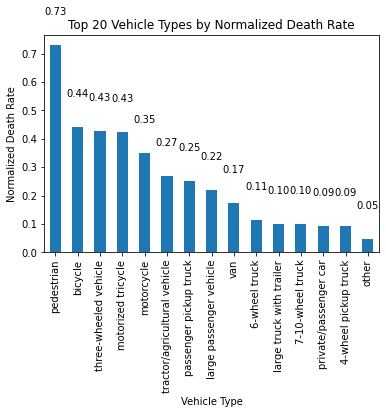

In [258]:
# Extract relevant columns from the original DataFrame
df_vehicle = df[['vehicle_type', 'number_of_fatalities']].copy()

# Group by vehicle type, summing up total fatalities and counting the number of accidents for each type
df_vehicle = df_vehicle.groupby('vehicle_type').agg({'number_of_fatalities': 'sum', 'vehicle_type': 'count'})

# Rename columns for clarity
df_vehicle.columns = ['Total Deaths', 'Vehicle Type Count']

# Calculate normalized death rate (deaths per vehicle) and keep only the relevant column
df_vehicle['Normalized Death'] = (df_vehicle['Total Deaths']/df_vehicle['Vehicle Type Count'])
df_vehicle = df_vehicle.drop(columns = ['Total Deaths','Vehicle Type Count'])

# Sort the DataFrame by normalized death rate in descending order
df_vehicle = df_vehicle.sort_values(by='Normalized Death', ascending=False)

# Create a bar plot to visualize the normalized death rate for each vehicle type
ax = df_vehicle.head(20).plot(kind='bar', legend=False)

# Add values on top of each bar
for i, value in enumerate(df_vehicle.head(20)['Normalized Death']):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Normalized Death Rate')
plt.title('Top 20 Vehicle Types by Normalized Death Rate')

plt.show()


Pedestrians have the highest death rate at 0.73 deaths per accident while the lowest is 4 wheel pickup truck at 0.09 deaths per accident

### Agency Response Time

In [267]:
#Create new dataframe for agency and response time
df['response_time'] = (df.report_datetime-df.incident_datetime).astype('timedelta64[h]')
df_response = df[['agency', 'response_time']].copy()

# Calculate IQR
Q1 = df_response['response_time'].quantile(0.25)
Q3 = df_response['response_time'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
df_response = df_response[(df_response['response_time'] >= lower_limit) & (df_response['response_time'] <= upper_limit)]

#Group rows by agency and find average
df_response = df_response.groupby('agency')['response_time'].mean()
df_response.columns = ['agency', 'average_response_time']
df_response.head()

agency
department of highways              1440.942794
department of rural roads            376.878232
expressway authority of thailand     852.049605
Name: response_time, dtype: float64

Let's move on to making this dataset more interactive and find further insights through PowerBI. 